<a href="https://colab.research.google.com/github/mfathul21/loan-prediction/blob/main/Loan_Prediction_Based_on_Customers_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction Based on Customers Behaviour

## Domain Project

Dalam industri keuangan, khususnya pada perusahaan pemberi pinjaman, manajemen risiko kredit adalah aspek yang sangat penting. Salah satu risiko utama yang dihadapi oleh perusahaan pemberi pinjaman adalah risiko kredit, yaitu kemungkinan bahwa peminjam gagal membayar pinjamannya. Ketika seorang peminjam gagal membayar (default), ini tidak hanya berdampak buruk pada keuangan perusahaan, tetapi juga dapat mengganggu proses bisnis dan menurunkan kepuasan pelanggan.

Proses manual dalam menilai dan menyetujui aplikasi pinjaman sering kali memakan waktu yang lama dan tidak efisien. Hal ini dapat mengakibatkan penundaan dalam memberikan keputusan pinjaman kepada pelanggan, yang pada gilirannya dapat memengaruhi kepuasan pelanggan dan memperlambat aliran kas perusahaan.

Untuk mengatasi tantangan ini, diperlukan suatu sistem yang dapat memprediksi dengan tepat dan cepat peminjam mana yang berpotensi gagal membayar dan peminjam mana yang layak untuk diberikan pinjaman. Dengan demikian, perusahaan dapat meningkatkan tingkat pengembalian pinjaman (repayment rate) dan mengoptimalkan proses persetujuan pinjaman.

## Business Understanding

**Problem Statement**

1. Bagaimana memahami perilaku dan preferensi pelanggan yang *good borrower* (kecil probabilitas default) dan *bad borrower* (besar probabilitas default)
2. Bagaimana mengurangi risiko kredit akibat tingginya jumlah peminjam yang gagal bayar?
3. Bagaimana mempercepat proses penilaian dan persetujuan pinjaman untuk meningkatkan efisiensi operasional dan kepuasan pelanggan?

**Tujuan Proyek**

1. Memahami Perilaku Pelanggan:
   - Mengembangkan model prediktif untuk mengidentifikasi *good borrowers* dan *bad borrowers* melalui analisis data pelanggan.

2. Mengurangi Risiko Kredit:
   - Mengurangi tingkat gagal bayar sebesar 20% dalam satu tahun dengan menggunakan penilaian risiko yang lebih akurat.

3. Meningkatkan Efisiensi dan Kepuasan Pelanggan:
   - Mengotomatisasi proses penilaian kredit, mengurangi waktu persetujuan pinjaman dari 7 hari menjadi kurang dari 24 jam.
   - Meningkatkan kepuasan pelanggan sebesar 15% dalam enam bulan setelah implementasi.

## Data Understanding

Data yang Anda gunakan pada proyek kali ini adalah ["Loan Prediction Based on Customers Behaviour"](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv) yang diunduh dari Kaggle API. Untuk tahap training, dapat dilakukan hanya dari file "Training Data.csv" yang akan displit kembali untuk menjadi data train dan test pada tahap modelling. Selain itu, dataset ini juga cukup bersih sehingga tidak terlalu banyak memerlukan proses data cleaning.

Dataset ini memiliki 252000 baris dengan 13 fitur, yang terdiri fitur non-numerik seperti Married/Single, House_Ownership, Car_Ownership, Profession, CITY, dan STATE, serta fitur numerik seperti Id, Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, dan Risk_Flag. Fitur-fitur ini adalah fitur yang akan Anda gunakan dalam menemukan pola pada data untuk memprediksi fitur target yaitu Risk_Flag.

## Data Loading

### Download datasets from Kaggle to Google Colab

In [1]:
# !pip install nbformat==5.10.4 -q
# !pip install nbconvert==7.16.1 -q
!pip install kaggle -q
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.6 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadfathul","key":"86f7af68314a74218ed685350e322691"}'}

In [3]:
import json
import os

# Check if the Kaggle API configuration directory exists, and if not, create it.
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Move the uploaded Kaggle JSON file to the configuration directory.
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set the permissions for the Kaggle JSON file.
os.chmod('/root/.kaggle/kaggle.json', 600)

In [4]:
!kaggle datasets download -d subhamjain/loan-prediction-based-on-customer-behavior

Dataset URL: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior
License(s): other
 97% 5.00M/5.15M [00:00<00:00, 34.6MB/s]
100% 5.15M/5.15M [00:00<00:00, 35.4MB/s]


In [5]:
!unzip -q loan-prediction-based-on-customer-behavior.zip

### Import Datasets

In [131]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set_style('dark')

In [132]:
df = pd.read_csv('Training Data.csv')
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
245298,245299,5204416,67,9,married,rented,no,Financial_Analyst,Nellore[14][15],Andhra_Pradesh,9,10,0
97656,97657,28561,63,13,single,rented,yes,Scientist,Ranchi,Jharkhand,13,12,0
194938,194939,6201762,46,1,single,rented,no,Lawyer,Kochi,Kerala,1,10,1
213794,213795,3720964,26,12,single,rented,no,Chartered_Accountant,Latur,Maharashtra,11,13,0
57692,57693,6673726,46,17,single,rented,yes,Chemical_engineer,Kochi,Kerala,13,11,0


Some questions:

1. Bagaimana distribusi pendapatan (income) dari pengguna dalam dataset ini?
2. Bagaimana distribusi usia (age) dari pengguna dalam dataset ini?
3. Apa rata-rata pengalaman profesional (experience) dari pengguna dalam dataset ini?
4. Berapa persentase pengguna yang sudah menikah (married) dan yang masih lajang (single)?
5. Bagaimana persebaran kepemilikan rumah (house_ownership) di antara pengguna? Apakah mayoritas dari mereka memiliki rumah, menyewa, atau tidak memiliki?
6. Berapa persentase pengguna yang memiliki kepemilikan mobil (car_ownership)?
7. Apa profesi (profession) yang paling umum di antara pengguna dalam dataset ini?
8. Apa kota (city) dengan jumlah pengguna terbanyak?
9. Apakah terdapat perbedaan signifikan dalam tingkat risiko kredit (risk_flag) antara pengguna yang memiliki mobil dengan yang tidak?
10. Apakah ada korelasi antara usia pengguna dan risiko kredit?
11. Apakah pengalaman profesional (experience) berhubungan dengan risiko kredit yang diambil oleh pengguna?
12. Apakah durasi tinggal di rumah saat ini (current_house_yrs) mempengaruhi risiko kredit?
13. Bagaimana distribusi risiko kredit di berbagai profesi (profession)?
14. Apakah ada korelasi antara usia (age) dan pendapatan (income) dari pengguna?
15. Apakah ada perbedaan dalam tingkat risiko kredit antara pengguna yang tinggal di kota-kota berbeda (city)?

## Exploratory Data Analysis (EDA)

### Features Description

Berdasarkan informasi dari Kaggle, fitur-fitur pada Travel Insurance dataset adalah sebagai berikut:

- `id` - Id of user
- `income` - Income of the user
- `age` - Age of the user
- `experience` - Professional experience of the user in years
- `married/single` - Whether married or single
- `house_ownership` - Owned or rented or neither
- `car_ownership` - Does the person own a car
- `profession` - Profession
- `city` - City of residence
- `state` - State of residence
- `current_job` - Years of experience in the current job
- `current_house_yrs` - Number of years in the current residence
- `risk_flag` - Defaulted on a loan

In [133]:
df.columns = [x.lower() for x in df.columns.to_list()]
df.columns

Index(['id', 'income', 'age', 'experience', 'married/single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [134]:
df.dtypes

id                    int64
income                int64
age                   int64
experience            int64
married/single       object
house_ownership      object
car_ownership        object
profession           object
city                 object
state                object
current_job_yrs       int64
current_house_yrs     int64
risk_flag             int64
dtype: object

Perhatikan, setiap fitur memiliki tipe data yang sesuai. Namun, untuk keperluan pemodelan dengan machine learning, fitur-fitur kategorikal akan dikonversi menjadi fitur numerik.

### Check Missing Values & Duplicated Data

In [135]:
df.isna().sum()

id                   0
income               0
age                  0
experience           0
married/single       0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

Tidak terdapat data yang hilang (missing value) sehingga tidak perlu dilakukan drop missing value ataupun imputasi dengan nilai lain seperti median, mean, atau lainnya.

In [136]:
df.duplicated().any()

False

Tidak ditemukan data yang duplikat.

### Descriptive Statistics

In [137]:
def currency_formatter(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x * 1e-6)
    elif x >= 1e3:
        return '{:1.0f}k'.format(x * 1e-3)
    else:
        return '{:1.0f}'.format(x)

formatter = FuncFormatter(currency_formatter)

In [138]:
df.describe()

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Dari hasil fungsi `.describe()`, tidak ditemukan informasi yang anomali atau ambigu. Berikut adalah informasi yang diperoleh:

- Jumlah data (baris atau record) adalah 252000 baris data.
- Pendapatan(income): Rata-rata pendapatan pelanggan adalah Rs5.000.000 dengan rentang Rs10.000an - Rs9.900.000an serta median yang tidak jauh berbeda dengan rata-rata tersebut sehingga mengindikasikan tidak adanya outlier pada data ini.
- Usia (age): Rata-rata usia pelanggan adalah sekitar 49 tahun, dengan rentang usia antara 21 hingga 79 tahun.
- Pengalaman (experience): Rentang pengalaman yang dimiliki oleh pelanggan adalah 0 - 20 tahun dengan rata-rata 10 tahun.
- Lama di pekerjaan saat ini (current_job_yrs): Rentang dalam pengalaman kerja saat ini adalah 0 - 14 tahun dengan rata-rata 6 tahun.
- Lama di rumah saat ini (current_house_yrs): Pelanggan cenderung tinggal di rumah mereka selama 10 hingga 14 tahun.    
- Gagal membayar pinjaman (risk_flag): Terdapat dua nilai yaitu 0 untuk pelanggan yang tidak mengalami defaul sedangkan 1 untuk pelanggan yang mengalami atau pernah default.

In [139]:
df.describe(include='O')

,married/single,house_ownership,car_ownership,profession,city,state
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


- Status (married/single): Mayoritas pelanggan adalah yang masih lajang (single).
- Kepemilikan rumah (house_ownership): Mayoritas pelanggan memiliki rumah dalam status sewa (rented).
- Kepemilikan mobil (car_ownership): Mayoritas pelanggan tidak memiliki mobil.
- Pekerjaan (profession): Pekerjaan yang paling umum di antara pelanggan adalah fisikawan.
- Kota (city): Mayoritas pelanggan berasal dari kota Vijayanagaram.
- Wilayah (state): Mayoritas pelanggan berasal dari wilayah Uttar Pradesh.

### Data Visualization - Numerical Features

**Income Features**

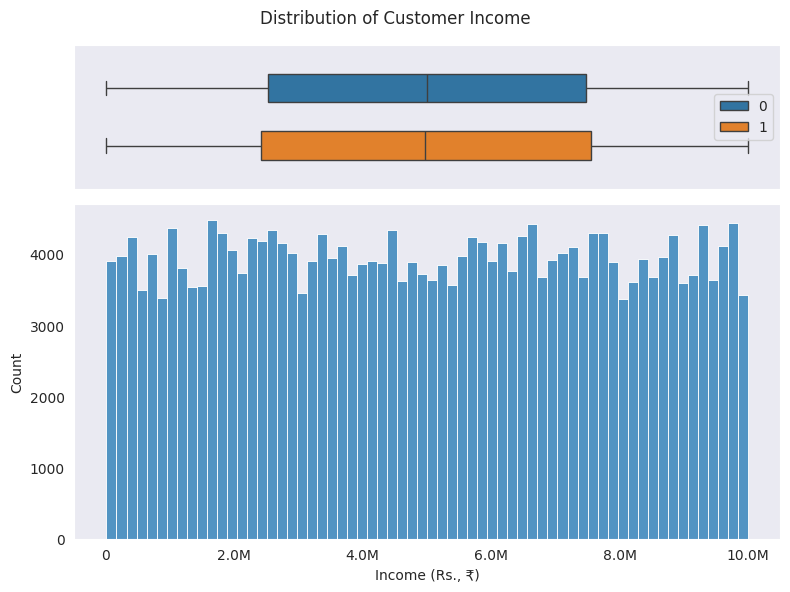

In [140]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       sharex=True, height_ratios=[0.3, 0.7],
                       figsize=(8,6))

sns.boxplot(x='income', hue='risk_flag', width=0.8, gap=0.5, data=df, ax=ax[0])
sns.histplot(x='income', data=df, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Income (Rs., ₹)')

ax[0].legend(loc='center right')
plt.suptitle('Distribution of Customer Income')
plt.tight_layout()
plt.show()

Distribusi pendapatan pelanggan terdistribusi merata dengan pendapatan tertinggi mencapai Rs10.000.000. Selain itu, IQR dari pendapatan pelanggan yang mengalami default lebih besar daripada yang tidak mengalami default, menunjukkan variasi yang lebih besar pada pendapatan pelanggan yang mengalami default. Penting untuk dicatat bahwa dalam distribusi ini tidak ada nilai outlier.

**Age Features**

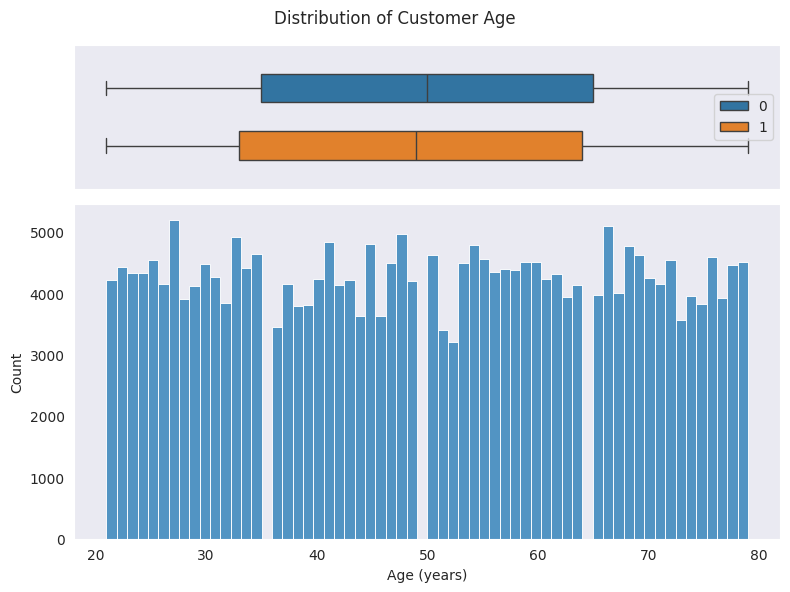

In [141]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       sharex=True, height_ratios=[0.3, 0.7],
                       figsize=(8,6))

sns.boxplot(x='age', hue='risk_flag', width=0.8, gap=0.5, data=df, ax=ax[0])
sns.histplot(x='age', data=df, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Age (years)')

ax[0].legend(loc='center right')
plt.suptitle('Distribution of Customer Age')
plt.tight_layout()
plt.show()

Distribusi usia pelanggan antara 20 hingga 80 tahun terdistribusi merata, dan tidak ada data outlier yang terdeteksi. Pelanggan yang pernah mengalami default cenderung memiliki usia yang lebih muda dibandingkan dengan yang tidak pernah mengalami default, seperti yang ditunjukkan oleh nilai Q1, Q2, dan Q3 yang lebih kecil.

**Experience Features**

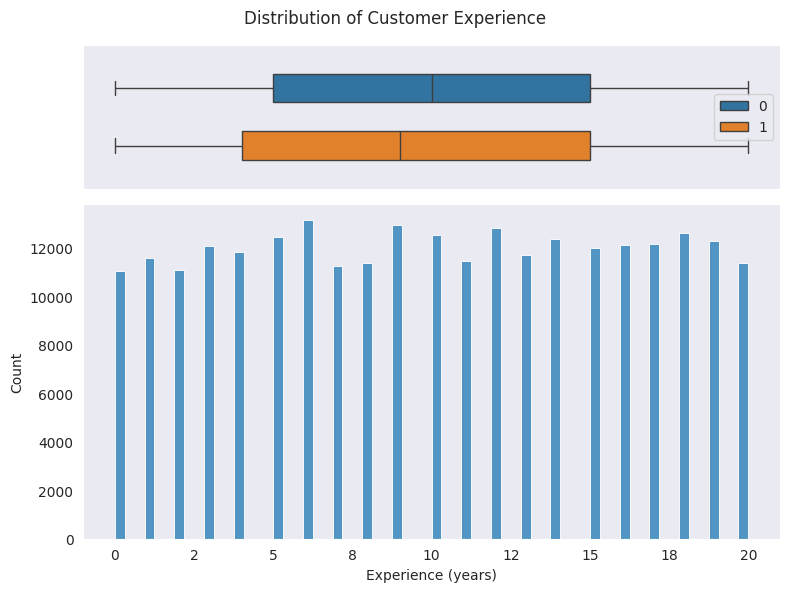

In [142]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       sharex=True, height_ratios=[0.3, 0.7],
                       figsize=(8,6))

sns.boxplot(x='experience', hue='risk_flag', width=0.8, gap=0.5, data=df, ax=ax[0])
sns.histplot(x='experience', data=df, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Experience (years)')

ax[0].legend(loc='center right')
plt.suptitle('Distribution of Customer Experience')
plt.tight_layout()
plt.show()

Pelanggan memiliki pengalaman kerja yang merata dalam rentang 0 hingga 20 tahun tanpa adanya outlier. Pelanggan yang pernah mengalami default cenderung memiliki pengalaman kerja yang lebih baru dibandingkan dengan pelanggan yang tidak pernah mengalami default, yang ditunjukkan oleh nilai Q1 dan Q2 yang lebih kecil.

**Current Job Experience Features**

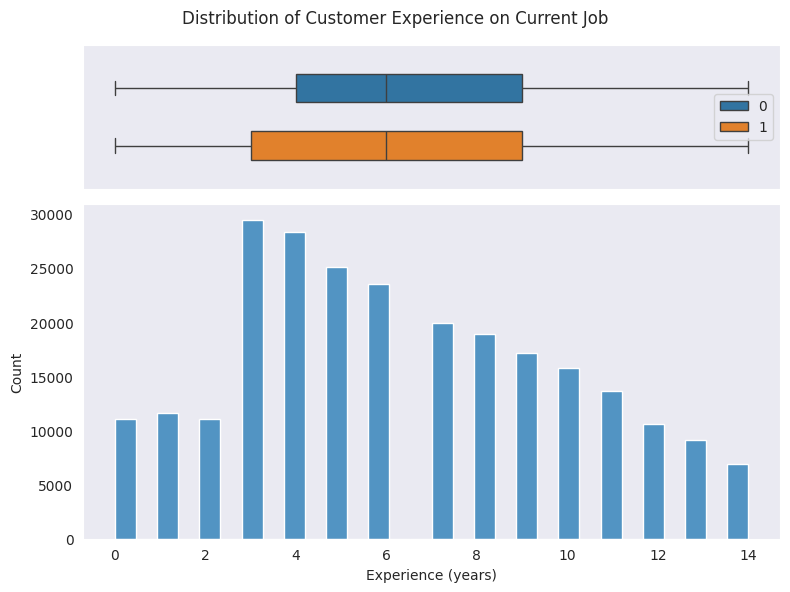

In [143]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       sharex=True, height_ratios=[0.3, 0.7],
                       figsize=(8,6))

sns.boxplot(x='current_job_yrs', hue='risk_flag', width=0.8, gap=0.5, data=df, ax=ax[0])
sns.histplot(x='current_job_yrs', bins=30, data=df, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Experience (years)')

ax[0].legend(loc='center right')
plt.suptitle('Distribution of Customer Experience on Current Job')
plt.tight_layout()
plt.show()

Mayoritas pelanggan memiliki pengalaman kerja saat ini sekitar 4 hingga 5 tahun, dan tidak ada outlier dalam data. Pelanggan yang tidak pernah mengalami default cenderung memiliki pengalaman kerja saat ini yang lebih lama dibandingkan dengan pelanggan yang pernah mengalami default, yang ditunjukkan oleh nilai Q1 yang lebih besar.

**Current House Features**

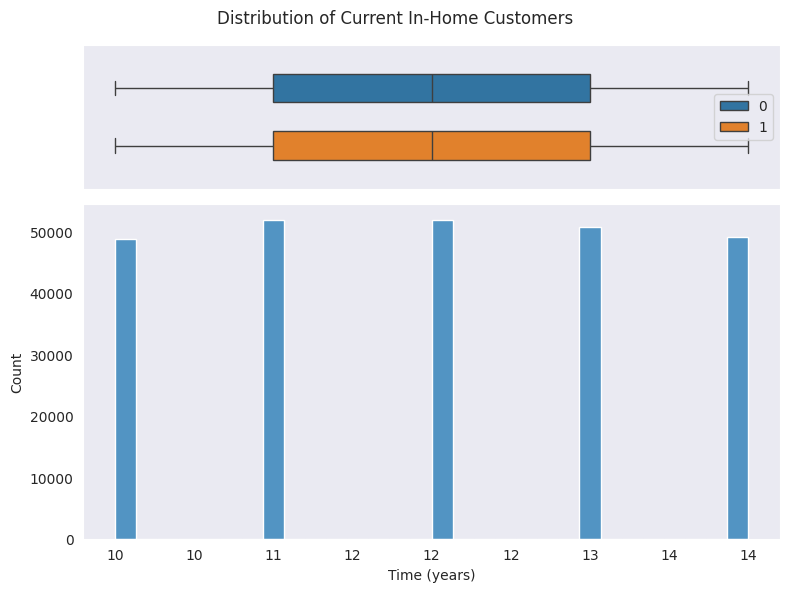

In [144]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       sharex=True, height_ratios=[0.3, 0.7],
                       figsize=(8,6))

sns.boxplot(x='current_house_yrs', hue='risk_flag', width=0.8, gap=0.5, data=df, ax=ax[0])
sns.histplot(x='current_house_yrs', bins=30, data=df, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Time (years)')

ax[0].legend(loc='center right')
plt.suptitle('Distribution of Current In-Home Customers')
plt.tight_layout()
plt.show()

Pehatikan, untuk distribusi lama pelanggan tinggal di rumah saat ini memiliki rentang 10 - 14 tahun dan tersebar secara merata. Selain itu, berdasarkan boxplot tidak ditemukan outlier serta perbedaan antara pelanggan yang default dan non-default terhadap lama tinggal di rumah saat ini.

### Data Visualization - Categorical Features

**Married/Single Features**

married/single
single     226272
married     25728
Name: count, dtype: int64 



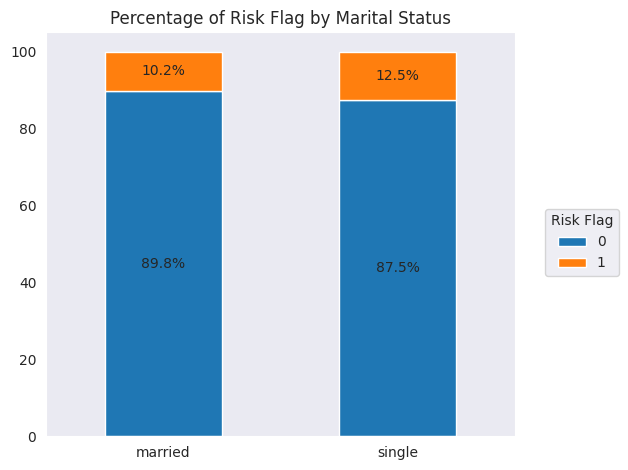

In [145]:
print(df['married/single'].value_counts(), '\n')

grouped_df = df.groupby(['married/single', 'risk_flag']).size().unstack(fill_value=0)
percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

ax = percentage_df.plot(kind='bar', stacked=True)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Percentage of Risk Flag by Marital Status')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.legend(title='Risk Flag', bbox_to_anchor=(1.05, 0.58), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Mayoritas pelanggan berstatus lajang (single). Selain itu, jika dilihat dari proporsi status menikah/lajang untuk masing-masing kategori default atau non-default, diperoleh bahwa pelanggan yang telah menikah (married) memiliki kemungkinan non-default lebih besar dibandingkan pelanggan yang masih lajang (single).

**House Ownership Features**

house_ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64 



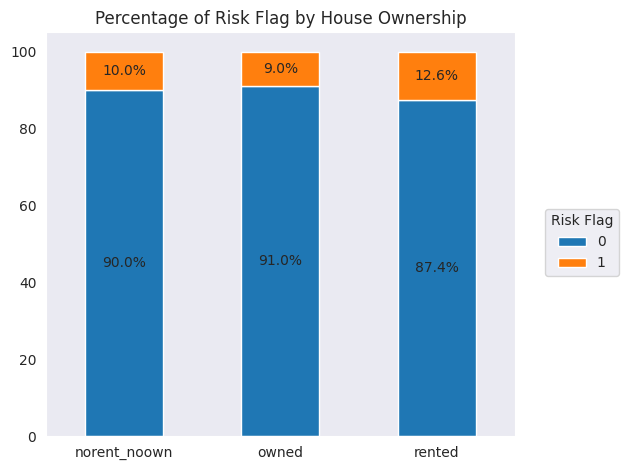

In [146]:
print(df['house_ownership'].value_counts(), '\n')

grouped_df = df.groupby(['house_ownership', 'risk_flag']).size().unstack(fill_value=0)
percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

ax = percentage_df.plot(kind='bar', stacked=True)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Percentage of Risk Flag by House Ownership')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.legend(title='Risk Flag', bbox_to_anchor=(1.05, 0.58), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Mayoritas pelanggan memiliki rumah dengan status sewa (rented). Selain itu, jika dilihat dari proporsi status kepemilikan rumah untuk masing-masing kategori default atau non-default, diperoleh bahwa pelanggan yang memiliki rumah dengan status kepemilikan (owned) mempunyai kemungkinan non-default lebih besar dibandingkan pelanggan yang tidak memiliki rumah (norent_noown) dan sewa rumah (rented).

**Car Ownership Features**

car_ownership
no     176000
yes     76000
Name: count, dtype: int64 



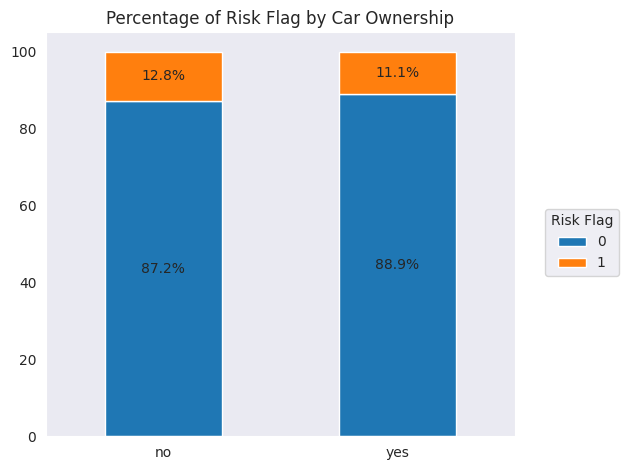

In [147]:
print(df['car_ownership'].value_counts(), '\n')

grouped_df = df.groupby(['car_ownership', 'risk_flag']).size().unstack(fill_value=0)
percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

ax = percentage_df.plot(kind='bar', stacked=True)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Percentage of Risk Flag by Car Ownership')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.legend(title='Risk Flag', bbox_to_anchor=(1.05, 0.58), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Mayoritas pelanggan tidak memiliki mobil. Selain itu, jika dilihat dari proporsi kepemilikan mobil untuk masing-masing kategori default atau non-default, diperoleh bahwa pelanggan yang memiliki mobil mempunyai kemungkinan non-default lebih besar dibandingkan pelanggan yang tidak memiliki mobil.

**Profession Features**

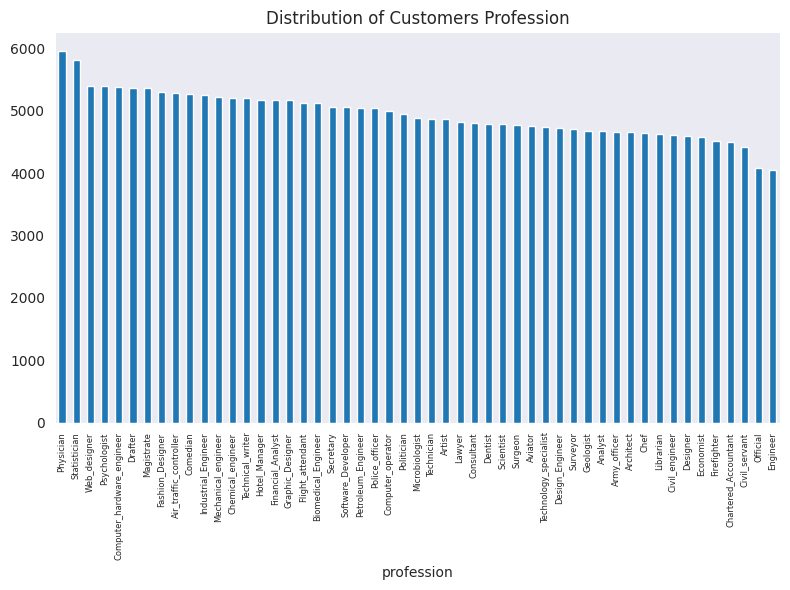

In [148]:
plt.figure(figsize=(8,6))
df['profession'].value_counts().plot(kind='bar')
plt.title('Distribution of Customers Profession')

plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

Pelanggan berasal dari berbagai profesi dengan mayoritas memiliki berprofesi sebagai fisikawan dan statistikawan.

In [149]:
print('Jumlah profesi:', df['profession'].nunique())
print(df['profession'].unique())

Jumlah profesi: 51
['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']


Perhatikan, jumlah profesi pelanggan terdiri dari 51 profesi yang berbeda. Oleh karena itu, untuk keperluan analisis dan pemodelan, profesi-profesi ini akan dimapping atau dikelompokkan terlebih dahulu agar lebih mudah dianalisis dan digunakan dalam model machine learning. Pengelompokkan ini akan membantu dalam mengurangi kompleksitas data dan memberikan wawasan yang lebih jelas mengenai pengaruh profesi terhadap variabel target.

In [150]:
profession_grouped = df.groupby(['profession', 'risk_flag']).size().unstack(fill_value=0)
profession_percent = profession_grouped.div(profession_grouped.sum(axis=1), axis=0) * 100

profession_percent.sort_values(by=1, ascending=False).head()

risk_flag,0,1
profession,,
Police_officer,83.594836,16.405164
Chartered_Accountant,84.642778,15.357222
Army_officer,84.788672,15.211328
Surveyor,84.853627,15.146373
Software_Developer,85.157332,14.842668


Sebelum dikelompokkan, bisa kita ketahui berikut 5 profesi dengan proporsi dengan kemungkinan lebih besar untuk default dibandingkan profesi lainnya.

**City Features**

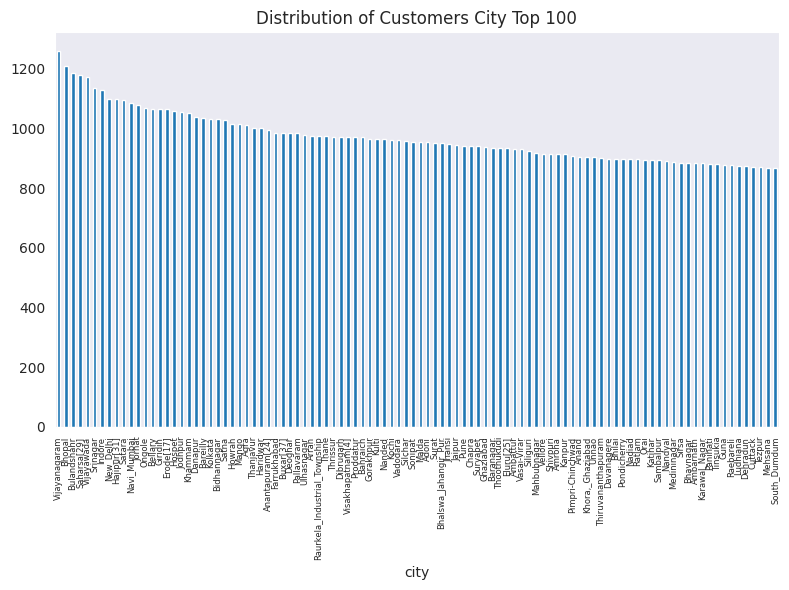

In [151]:
plt.figure(figsize=(8,6))
df['city'].value_counts().head(100).plot(kind='bar')
plt.title('Distribution of Customers City Top 100')

plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

Pelanggan berasal dari berbagai kota dengan mayoritas berasal dari Vijayanagaram.

In [152]:
print(df['city'].nunique())
print(df['city'].unique())

317
['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamarhati'
 'Bhusawal' 'Sirsa' 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer'
 'Ongole' 'Miryalaguda' 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga'
 'Chennai' 'Gulbarga' 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi'
 'Howrah' 'Aurangabad[39]' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar'
 'Bellary' 'Danapur' 'Purnia[26]' 'Bijapur' 'Patiala' 'Malda' 'Sagar'
 'Durgapur' 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur'
 'Naihati' 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda'
 'Nadiad' 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru[25]'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhik

Perhatikan, banyaknya kota berbeda dari pelanggan terdiri dari 317. Oleh karena itu, untuk keperluan analisis dan pemodelan, karena sudah ada fitur state yang memiliki kategori lebih kecil, fitur city akan dihapus untuk menghindari fitur yang redundan.

In [153]:
city_grouped = df.groupby(['city', 'risk_flag']).size().unstack(fill_value=0)
city_percent = city_grouped.div(city_grouped.sum(axis=1), axis=0) * 100

city_percent.sort_values(by=1, ascending=False).head()

risk_flag,0,1
city,,
Bhubaneswar,67.380560,32.619440
Gwalior,72.727273,27.272727
Bettiah[33],73.304158,26.695842
Kochi,74.713840,25.286160
Raiganj,76.044568,23.955432


Sebelum dihapus, bisa kita ketahui berikut 5 kota dengan proporsi dengan kemungkinan lebih besar untuk default dibandingkan pelanggan berasal dari kota lainnya.

**State Features**

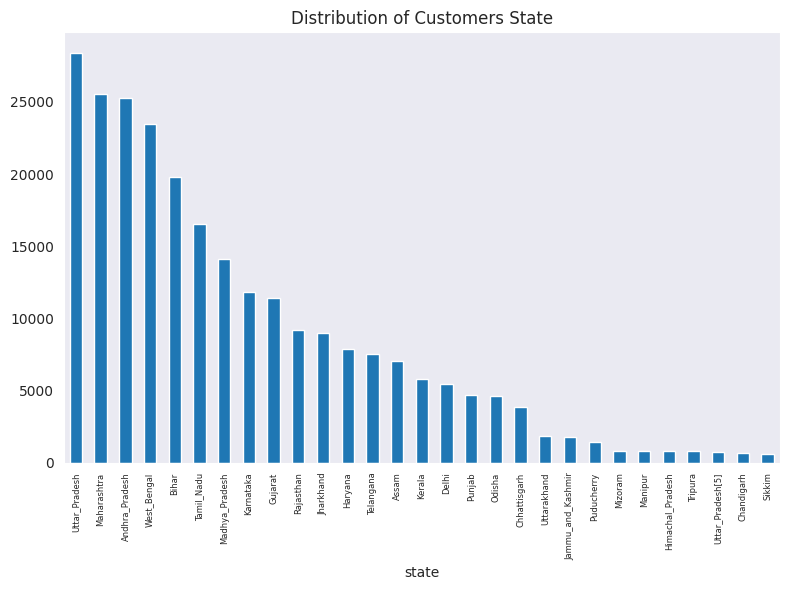

In [154]:
plt.figure(figsize=(8,6))
df['state'].value_counts().plot(kind='bar')
plt.title('Distribution of Customers State')

plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

Pelanggan berasal dari berbagai wilayah dengan mayorita pelanggan berasal dari Uttar Pradesh dan Maharashtra.

In [155]:
print('Jumlah wilayah:', df['state'].nunique())
print(df['state'].unique())

Jumlah wilayah: 29
['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Uttar_Pradesh[5]' 'Manipur' 'Sikkim']


Perhatikan, terdapat kesalahan penulisan pada Uttar_Pradesh[5], seharusnya menjadi Uttar_Pradesh, dan hanya terdapat 28 wilayah unik. Namun, dengan jumlah nilai unik yang masih cukup banyak yaitu 28, akan lebih baik untuk mengelompokkannya menjadi kelompok yang lebih kecil berdasarkan wilayah agar mempermudah proses pemodelan. Pengelompokkan ini akan membantu dalam mengurangi kompleksitas data dan memberikan wawasan yang lebih jelas mengenai pengaruh profesi terhadap variabel target.

In [156]:
state_grouped = df.groupby(['state', 'risk_flag']).size().unstack(fill_value=0)
state_percent = state_grouped.div(state_grouped.sum(axis=1), axis=0) * 100

state_percent.sort_values(by=1, ascending=False).head()

risk_flag,0,1
state,,
Manipur,78.445230,21.554770
Tripura,83.189122,16.810878
Kerala,83.290267,16.709733
Jammu_and_Kashmir,84.101124,15.898876
Madhya_Pradesh,84.563093,15.436907


Sebelum dikelompokkan, bisa kita ketahui berikut 5 wilayah dengan proporsi dengan kemungkinan lebih besar untuk default dibandingkan pelanggan berasal dari wilayah lainnya.

### Data Visualization - Correlation Features

<Figure size 800x600 with 0 Axes>

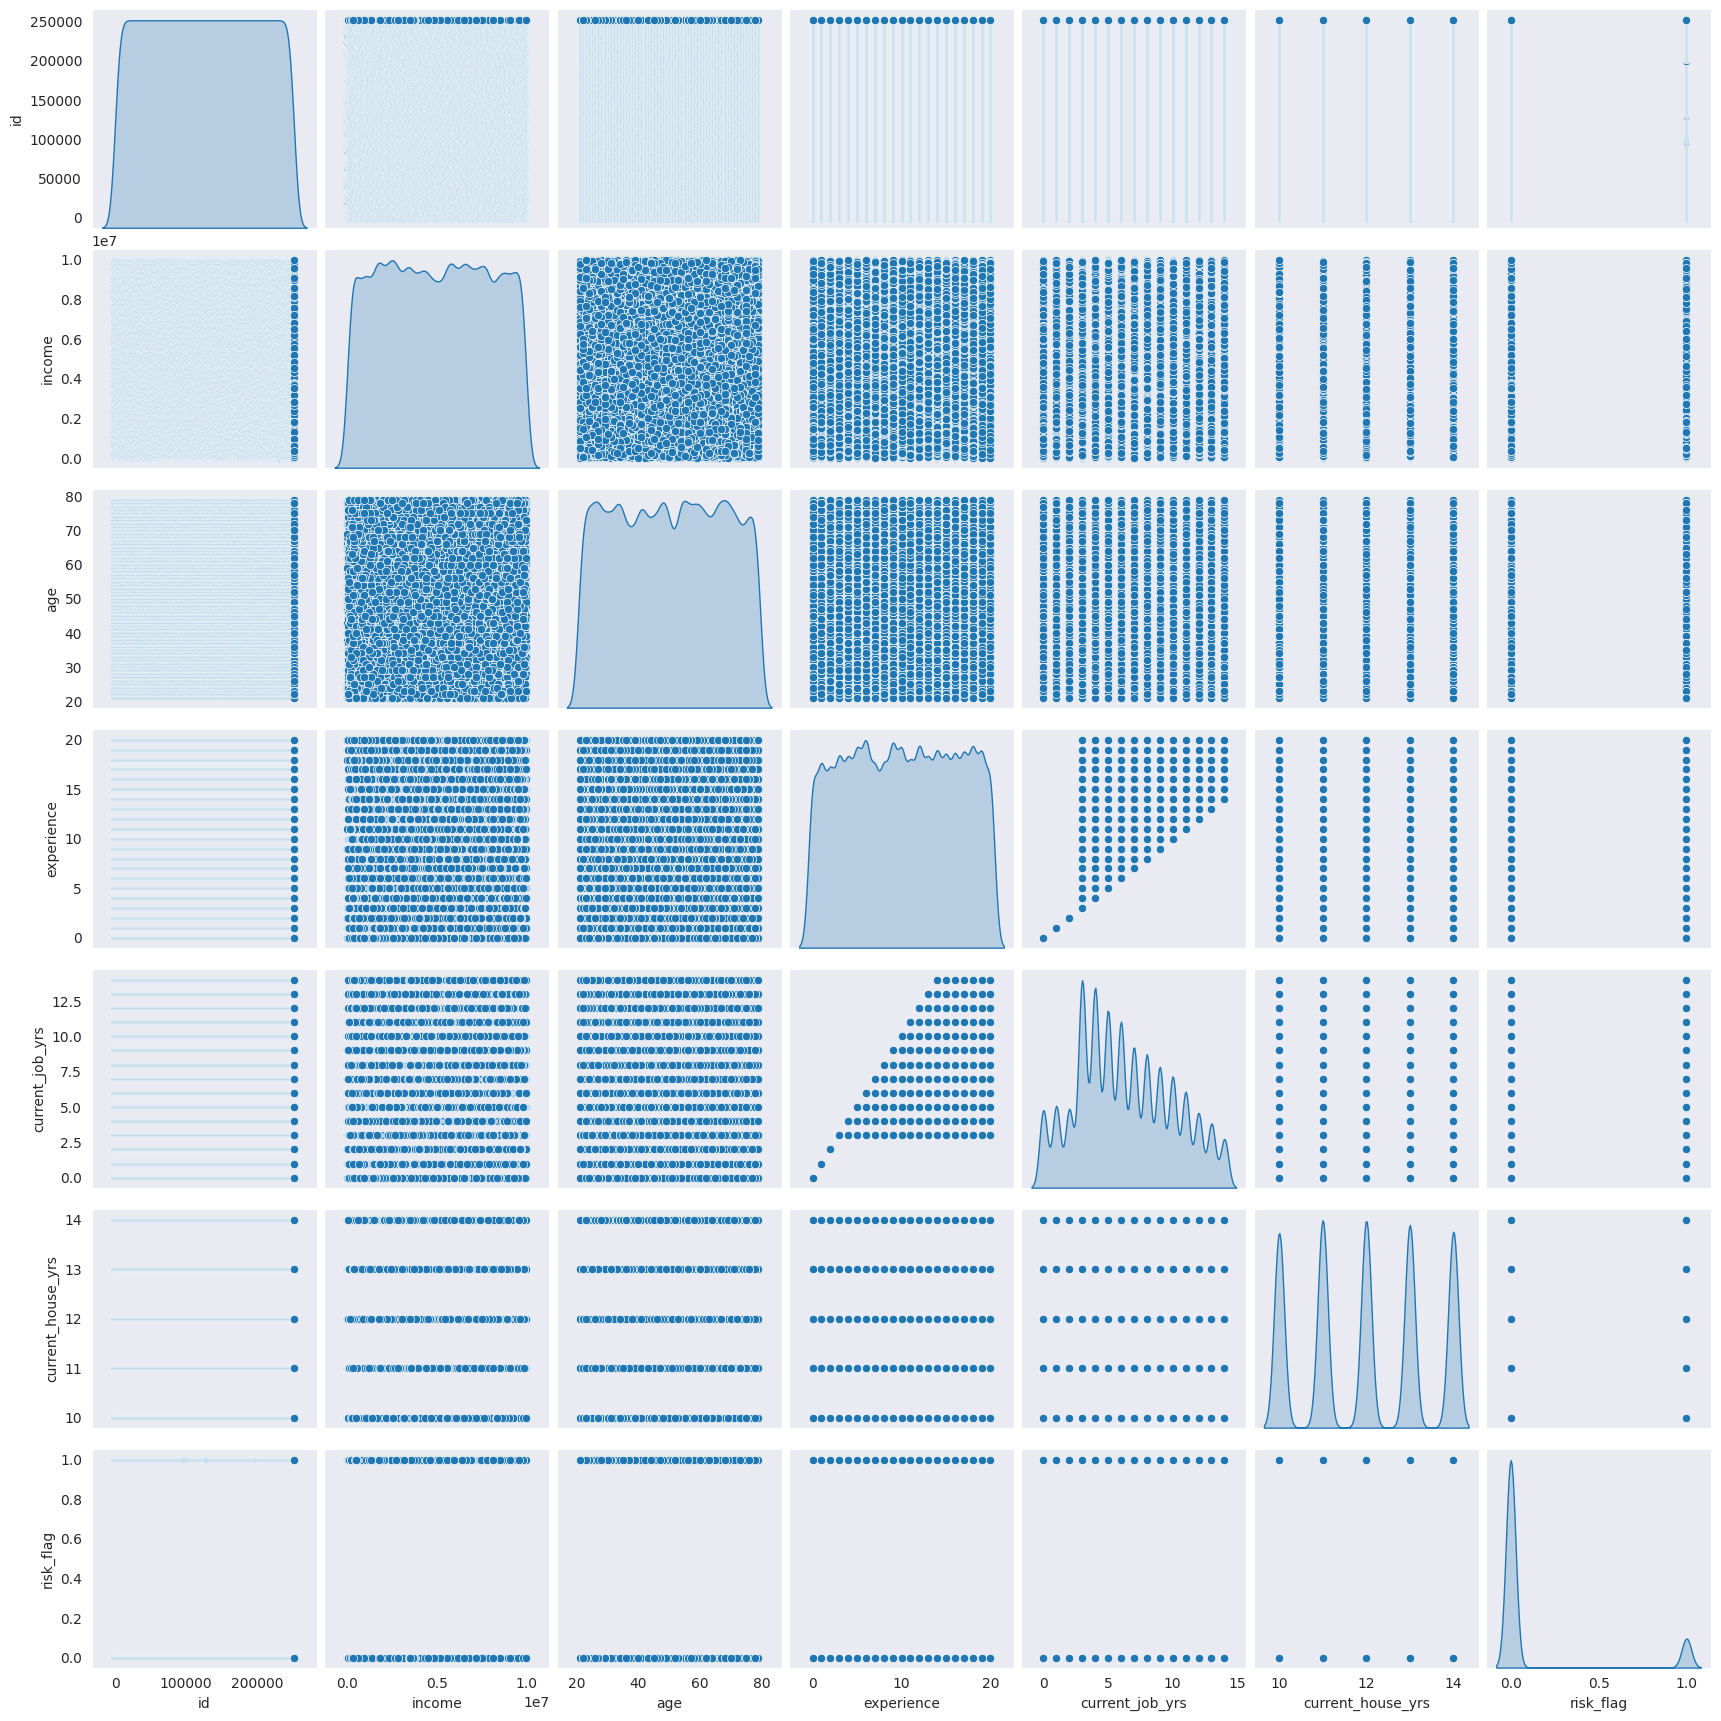

In [157]:
plt.figure(figsize=(8,6))
sns.pairplot(data=df, diag_kind='kde')

plt.show()

Tidak ditemukan pola yang menarik antar fitur terutama pada fitur target yaitu risk_flag.

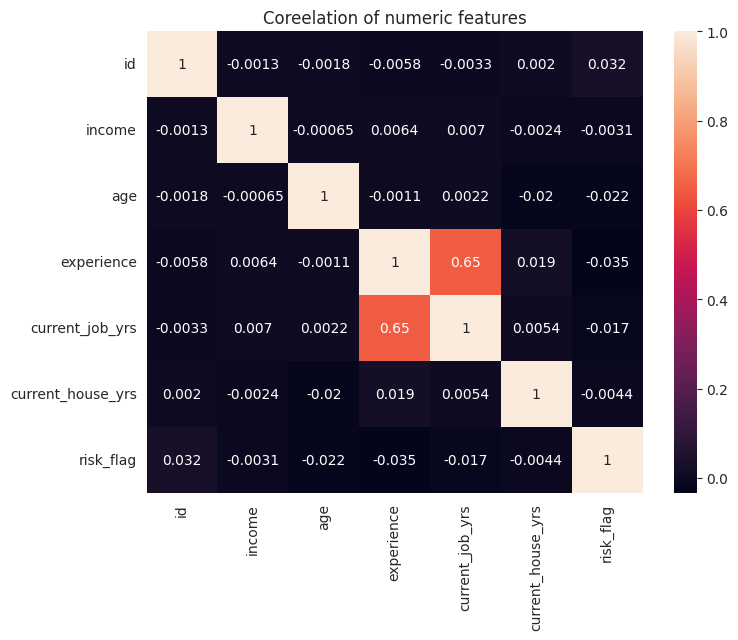

In [158]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Coreelation of numeric features")

plt.show()

Berdasarkan correlation map, terlihat bahwa fitur target "risk_flag" tidak memiliki korelasi yang signifikan dengan fitur numerik lainnya. Namun, ada temuan menarik terkait dengan korelasi antara "experience" dan "current_job_yrs" yang mencapai 0.65, menunjukkan adanya korelasi yang cukup kuat di antara keduanya.

## Data Preparation

1. Tidak terdapat nilai yang hilang, data yang diduplikasi, atau outlier, sehingga tidak diperlukan tindakan tambahan.
2. Ditemukan typo pada fitur state yaitu "Uttar_Pradesh[5]". Perlu diperbaiki menjadi "Uttar_Pradesh".
3. Profesi pelanggan akan dikelompokkan berdasarkan kemiripan antara profesi-profesi tersebut, membentuk kelompok profesi yang lebih kecil.
4. Wilayah pelanggan akan dikelompokkan berdasarkan zona wilayah, membentuk kelompok wilayah yang lebih kecil.
5. Fitur "id" akan dihapus karena tidak memberikan informasi yang relevan untuk analisis.
6. Fitur "city" akan dihapus karena memiliki banyak variasi nilai kategori (317 kategori), dan informasi tersebut telah diwakilkan dalam fitur "state". Dengan demikian, untuk menghindari redundansi, fitur "city" akan dihapus.
7. Encode fitur-fitur kategori seperti single/married, house_ownership, dan lainnya.

### Data Cleaning

**Replace Uttar_Pradesh[5] to Uttar_Pradesh**

In [159]:
df['state'] = df['state'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh')

In [160]:
print('Jumlah wilayah:', df['state'].nunique())
print(df['state'].unique())

Jumlah wilayah: 28
['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Manipur' 'Sikkim']


**Remove Id and City Features**

In [161]:
df.drop(columns=['id', 'city'], axis=1, inplace=True)
df.sample(5)

,income,age,experience,married/single,house_ownership,car_ownership,profession,state,current_job_yrs,current_house_yrs,risk_flag
166654,1931735,34,0,single,rented,yes,Comedian,Bihar,0,10,0
177118,5610392,31,6,married,rented,no,Computer_operator,Andhra_Pradesh,6,10,0
159698,7134787,63,15,single,rented,no,Web_designer,Odisha,12,12,0
152871,5522087,58,4,single,rented,yes,Librarian,Bihar,4,13,1
197682,9438795,62,14,single,rented,no,Technology_specialist,Maharashtra,10,11,0


### Data Transformation

**Mapping Profession Categories**

In [162]:
profession_categories = {
    "Mechanical_engineer": "Engineering", "Chemical_engineer": "Engineering",
    "Design_Engineer": "Engineering", "Biomedical_Engineer": "Engineering",
    "Computer_hardware_engineer": "Engineering", "Petroleum_Engineer": "Engineering",
    "Engineer": "Engineering", "Civil_engineer": "Engineering",
    "Industrial_Engineer": "Engineering", "Software_Developer": "Technology and IT",
    "Computer_operator": "Technology and IT", "Web_designer": "Technology and IT",
    "Technology_specialist": "Technology and IT", "Analyst": "Technology and IT",
    "Technical_writer": "Design and Creative", "Designer": "Design and Creative",
    "Graphic_Designer": "Design and Creative", "Fashion_Designer": "Design and Creative",
    "Architect": "Design and Creative", "Artist": "Design and Creative",
    "Financial_Analyst": "Finance and Economics", "Economist": "Finance and Economics",
    "Chartered_Accountant": "Finance and Economics", "Physician": "Medical and Health",
    "Dentist": "Medical and Health", "Surgeon": "Medical and Health",
    "Psychologist": "Medical and Health", "Microbiologist": "Medical and Health",
    "Flight_attendant": "Aviation and Transportation", "Air_traffic_controller": "Aviation and Transportation",
    "Aviator": "Aviation and Transportation", "Civil_servant": "Government and Public Service",
    "Politician": "Government and Public Service", "Lawyer": "Government and Public Service",
    "Police_officer": "Government and Public Service", "Firefighter": "Government and Public Service",
    "Army_officer": "Government and Public Service", "Magistrate": "Government and Public Service",
    "Hotel_Manager": "Management and Administration", "Secretary": "Management and Administration",
    "Consultant": "Management and Administration", "Official": "Management and Administration",
    "Scientist": "Science and Research", "Geologist": "Science and Research",
    "Statistician": "Science and Research", "Surveyor": "Science and Research",
    "Drafter": "Science and Research", "Librarian": "Others",
    "Comedian": "Others", "Chef": "Others", "Technician": "Others"
}

df['profession'] = df['profession'].map(profession_categories)

In [163]:
df['profession'].unique()

array(['Engineering', 'Technology and IT', 'Design and Creative',
       'Government and Public Service', 'Others', 'Finance and Economics',
       'Aviation and Transportation', 'Medical and Health',
       'Science and Research', 'Management and Administration'],
      dtype=object)

**Mapping State to Zone**

In [164]:
state_zone = {
    'Rajasthan':'West Zone', 'Maharashtra':'West Zone',
    'Gujarat':'West Zone', 'Andhra_Pradesh':'South Zone',
    'Kerala':'South Zone', 'Tamil_Nadu':'South Zone',
    'Puducherry':'South Zone', 'Telangana':'South Zone',
    'Karnataka':'South Zone', 'Jammu_and_Kashmir':'North Zone',
    'Himachal_Pradesh':'North Zone', 'Punjab':'North Zone',
    'Chandigarh':'North Zone', 'Uttarakhand':'North Zone',
    'Haryana':'North Zone', 'Delhi':'North Zone',
    'Uttar_Pradesh':'North Zone', 'Bihar':'East Zone',
    'West_Bengal':'East Zone', 'Jharkhand':'East Zone',
    'Odisha':'East Zone', 'Chhattisgarh':'Central Zone',
    'Madhya_Pradesh':'Central Zone', 'Sikkim':'North East Zone',
    'Mizoram':'North East Zone', 'Manipur':'North East Zone',
    'Tripura':'North East Zone', 'Assam':'North East Zone'}

df['state'] = df['state'].map(state_zone)

In [165]:
df['state'].unique()

array(['Central Zone', 'West Zone', 'South Zone', 'East Zone',
       'North Zone', 'North East Zone'], dtype=object)

**Encode Categorical Features**

In [166]:
df

,income,age,experience,married/single,house_ownership,car_ownership,profession,state,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,single,rented,no,Engineering,Central Zone,3,13,0
1,7574516,40,10,single,rented,no,Technology and IT,West Zone,9,13,0
2,3991815,66,4,married,rented,no,Design and Creative,South Zone,4,10,0
3,6256451,41,2,single,rented,yes,Technology and IT,East Zone,2,12,1
4,5768871,47,11,single,rented,no,Government and Public Service,South Zone,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Medical and Health,East Zone,6,11,0
251996,2843572,26,10,single,rented,no,Government and Public Service,Central Zone,6,11,0
251997,4522448,46,7,single,rented,no,Engineering,West Zone,7,12,0
251998,6507128,45,0,single,rented,no,Design and Creative,South Zone,0,10,0


### Feature Selection